# Evidence for ecological niche partitioning among ribbon and spotted

seals in the Bering Sea and implications for their resilience to climate change

Josh M. London [](https://orcid.org/0000-0002-3647-5046) (Alaska Fisheries Science Center)  
Heather L. Ziel (Alaska Fisheries Science Center)  
Lorrie D. Rea (University of Alaska, Fairbanks)  
Stacie M. Koslovsky (Alaska Fisheries Science Center)  
Michael F. Cameron (Alaska Fisheries Science Center)  
Peter L. Boveng (Alaska Fisheries Science Center)  
April 19, 2024

In deep-diving seals (*Phocidae*) niche partitioning has been observed as delineation in time, multi-dimensional use of the ocean, or diet composition. Here, we focus on two species of seals in the Bering Sea – ribbon seals (*Histriophoca fasciata*) and spotted seals (*Phoca largha*) – and evidence for niche partitioning from two decades of bio-logger deployments (n=110 ribbon; n=82 spotted) and stable isotope sampling (n=29 ribbon; n=43 spotted). Whiskers of dependent pups in the spring reflect the isotopic space of adult female diet in the winter (when the pup was developing in-utero) and sampling from the whisker base of adults in the spring corresponds with the isotopic space of their recent diet. In both seasons, spotted seals had higher mean δ13C (winter: +6.9%; spring: +3.8%) and δ15N (winter: +10.5%; spring = +12.1%) values, which are reflective of on-shelf and coastal foraging at a higher trophic level. Two-dimensional utilization distributions (UD) were estimated from bio-logger geolocations for each species during similar seasonal periods (‘spring’ and ‘fall-winter’). Optimally weighted auto-correlated kernel density estimates were combined into a population UD to test spatial overlap. Greater overlap was observed in the spring when both species rely on the marginal sea-ice zone for pupping, breeding, and molting. More separation was observed during the fall-winter season when spotted seals remained largely on the continental shelf and ribbon seals shifted to the shelf break and Bering Sea basin. Dive behavior records showed ribbon seals consistently diving to deeper depths (max dive depth = ~600m) compared to spotted seals (max dive depth = ~300m) indicating additional partitioning of resources within the water column. Changes in the extent and timing of sea ice in the Bering Sea along with anomalous warming events could disrupt the niche partitioning between these seal species and, thus, challenge their resilience to climate change.

<div __quarto_custom="true" __quarto_custom_type="Callout"
__quarto_custom_context="Block" __quarto_custom_id="1">

<div __quarto_custom_scaffold="true">

Under Development. Please do not cite or use

</div>

<div __quarto_custom_scaffold="true">

Please note this analysis and manuscript are still in draft form and under active development. Changes to results, code, and the manuscript are likely and this should not be cited or used for any reason. We are sharing the work and development of this manuscript in the spirit of open science, improved transparency, and scientific reproducibility.

We plan to provide a preprint to bioRxiv prior to journal submission.

In the meantime, if you have ideas, suggestions, or edits that might improve the analysis or manuscript, please file an Issue.

</div>

</div>

In [ ]:
library(RPostgres)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'dbplyr'

The following objects are masked from 'package:dplyr':

    ident, sql

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE


Attaching package: 'ctmm'

The following object is masked from 'package:ggplot2':

    annotate

# Mind Dump of Notes and Ideas

-   review definition of niche partitioning;
-   review any previous studies (terrestrial/marine) of niche partitioning that relied on evidence from stable isotopes, geo-locations from bio-loggers, OR, for marine animals, dive behavior;
-   focused review of niche partitioning in Arctic marine mammals
-   highlight any studies that used an integrated approach (e.g. stable isotopes and movement). any previous studies that integrated across all three?
-   review literature re: use of pup whiskers as surrogate for adult female foraging – advantages and challenges? why pups offer a unique opportunity for a known timeline
-   review climate change impacts in the Arctic/Bering Sea and focus in on ribbon and spotted seals
-   previously published studies, observations, LTK(?), describing the ecology of ribbon and spotted seals that indicated potential for niche separation
-   study objectives:
    -   Do stable isotope and bio-logging data from nearly 2 decades of research provide evidence for niche partitioning among ribbon and spotted seals?
    -   How might predicted climate change impacts in the Bering Sea affect this established partitioning of resources and will ribbon and spotted seals be resilient to such change?

## Notable literature:

### Stable isotopes, whisker growth

\[@hindell2012\], \[@velázquez-castillo2017\], \[@urquía2019\], \[@jones2020\], \[@beltran2015\], \[@mchuron2020\], \[@mchuron2016\], \[@beltran2016\], \[@lübcker2016\], \[@wang2016\], \[@lübcker2020\], \[@karpovich2022\]

### Utilization distributions, weighted AKDE, ctmm, spatial overlap

\[@alston2022\], \[@fleming2022\], \[@silva2021\], \[@fleming2019\], \[@winner2018\]

### Resource/niche partitioning

\[@oxtoby2017\], \[@kunisch2021\], \[@land-miller2024\], \[@carlyle2022\], \[@desforges2022\], \[@botta2018\], \[@petalas2021\], \[@raby2019\], \[@cleary2016\], \[@will2018\]

### Climate Change and Ecological Applications for Bio-loggers

\[@grebmeier2006\], \[@huntington2020\], \[@stafford2022\], \[@beltran2024\], \[@costa-pereira2022\]

# Introduction

Niche partitioning is the result of selective forces acting on sympatric individuals within an ecosystem that lead to differentiation or speciation to avoid conflict for limited resources in space and time. Individuals with overlapping ecological niches will be either be competitively displaced or they must differentiate across additional dimensions that minimizes competition and allows coexistence. Such adaptations to minimize competition and maximize resource extraction have typically evolved over long periods of time within relatively stable ecosystems. Rapid climate disruption, especially in high latitude regions, threatens to disrupt long established, and often nuanced, partitioning of resources both across sympatric species and within species. Niche partitioning, and the concern regarding the impact of rapid climate and ecosystem change, has been presented across multiple studies and a range of taxa from zooplankton, to upper trophic level fishes, seabirds, and marine mammals. Evidence for both adaptation across sympatric species and behavioral differentiation within species has been demonstrated.

In marine mammals like deep-diving seals (*Phocidae*), niche partitioning has been observed as delineation in time, multi-dimensional use of the ocean, or diet composition. Here, we focus on two species of seals in the Bering Sea – ribbon seals (*Histriophoca fasciata*) and spotted seals (*Phoca largha*) – and evidence for niche partitioning from two decades of bio-logger deployments (n=110 ribbon; n=82 spotted) and stable isotope sampling (n=29 ribbon; n=43 spotted).

# Methods

## Stable Isotope Analysis

In [ ]:
si_data <- readRDS(here::here('data/si_data.rds'))

min_year <- min(si_data$capture_dt) |> lubridate::year()
max_year <- max(si_data$capture_dt) |> lubridate::year()

n_ribbon_pup_si <- si_data |> 
  dplyr::filter(common_name == 'Ribbon seal',
                age_class %in% c('Pup','Young of year')) |> 
  dplyr::distinct(speno) |> nrow()

n_spotted_pup_si <- si_data |> 
  dplyr::filter(common_name == 'Spotted seal',
                age_class %in% c('Pup','Young of year')) |> 
  dplyr::distinct(speno) |> nrow()

n_ribbon_adult_si <- si_data |> 
  dplyr::filter(common_name == 'Ribbon seal',
                !age_class %in% c('Pup','Young of year')) |> 
  dplyr::distinct(speno) |> nrow()

n_spotted_adult_si <- si_data |> 
  dplyr::filter(common_name == 'Spotted seal',
                age_class %in% c('Pup','Young of year')) |> 
  dplyr::distinct(speno) |> nrow()

Whiskers, hair, and blood (RBC and Plasma) from ribbon and spotted seals of all age classes were collected in the field as part of larger research efforts studying the ecology and health of ice-associated seals in the Bering Sea. All samples were collected from live seals captured in the spring (April-June) within the marginal ice zone at the southern edge of sea-ice extent.

Stable isotope analysis was based on whiskers sampled from all age classes (dependent pup, young of the year, subadult, adult) between 2009 and 2022. For all age classes, samples were taken along the length of the whisker starting at the root. Samples further from the root represent the isotopic space further back in time. Stable isotopes from whiskers of dependent pups in the spring likely reflect the isotopic space of adult female diets in the winter (when the pup was developing in-utero) and sampling from the whisker base (segment 2) of adults in the spring corresponds with recent isotopic use (when those tissues were generated). Growth rates of whiskers in phocids are not linear and, thus, we cannot attribute a specific segment of the whisker to a specific point in time – except for the base segment near the root. Dependent pups, however, offer a unique opportunity because we know the majority of the whisker was developed in-utero and would represent the adult female’s forgaing during gestation (the preceding fall/winter).

In [ ]:
whisker_si_data <- si_data |>
  dplyr::filter(age_class %in% c('Pup'),
                whisker_segment_num > 1) |> 
  tidyr::pivot_wider(names_from = result_type, values_from = result_value) |> 
  dplyr::select(speno,age_class, whisker_to_cm, 
                whisker_segment = whisker_segment_num, 
                iso1 = D13C,iso2 = D15N,species = common_name) |> 
  dplyr::mutate(whisker_segment = whisker_segment*-1) |> 
  dplyr::arrange(speno,whisker_segment) |> 
  group_by(speno) |> 
  mutate(whisker_length = max(whisker_to_cm)) |> 
  ungroup()

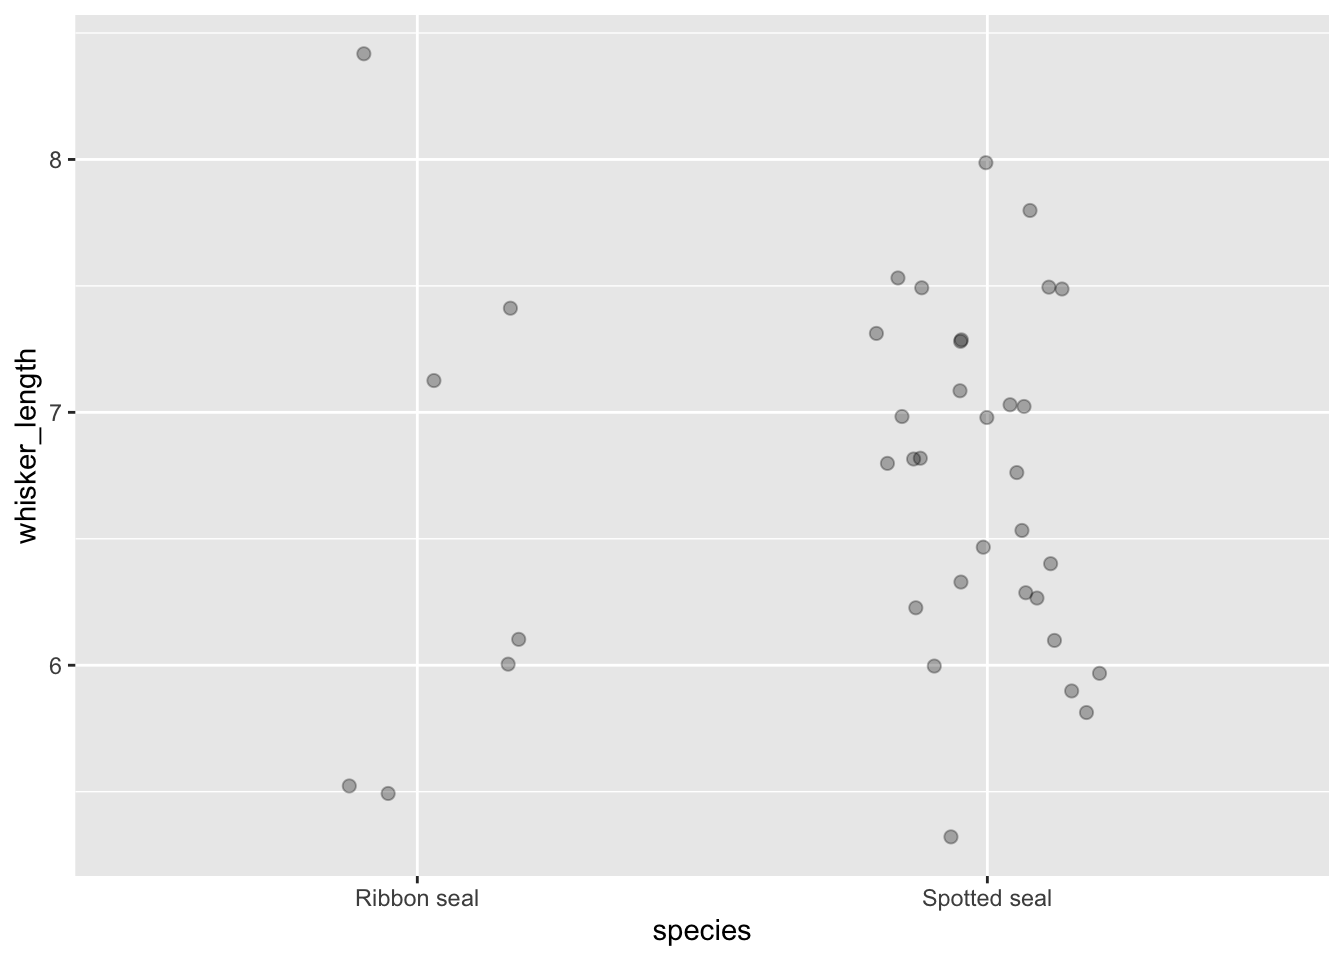

In [ ]:
ggplot(whisker_si_data |> filter(whisker_to_cm == whisker_length), 
       aes(x = species, y = whisker_length)) +
  geom_point(
    ## draw bigger points
    size = 2,
    ## add some transparency
    alpha = .3,
    ## add some jittering
    position = position_jitter(
      ## control randomness and range of jitter
      seed = 1, width = .2
    )
  )

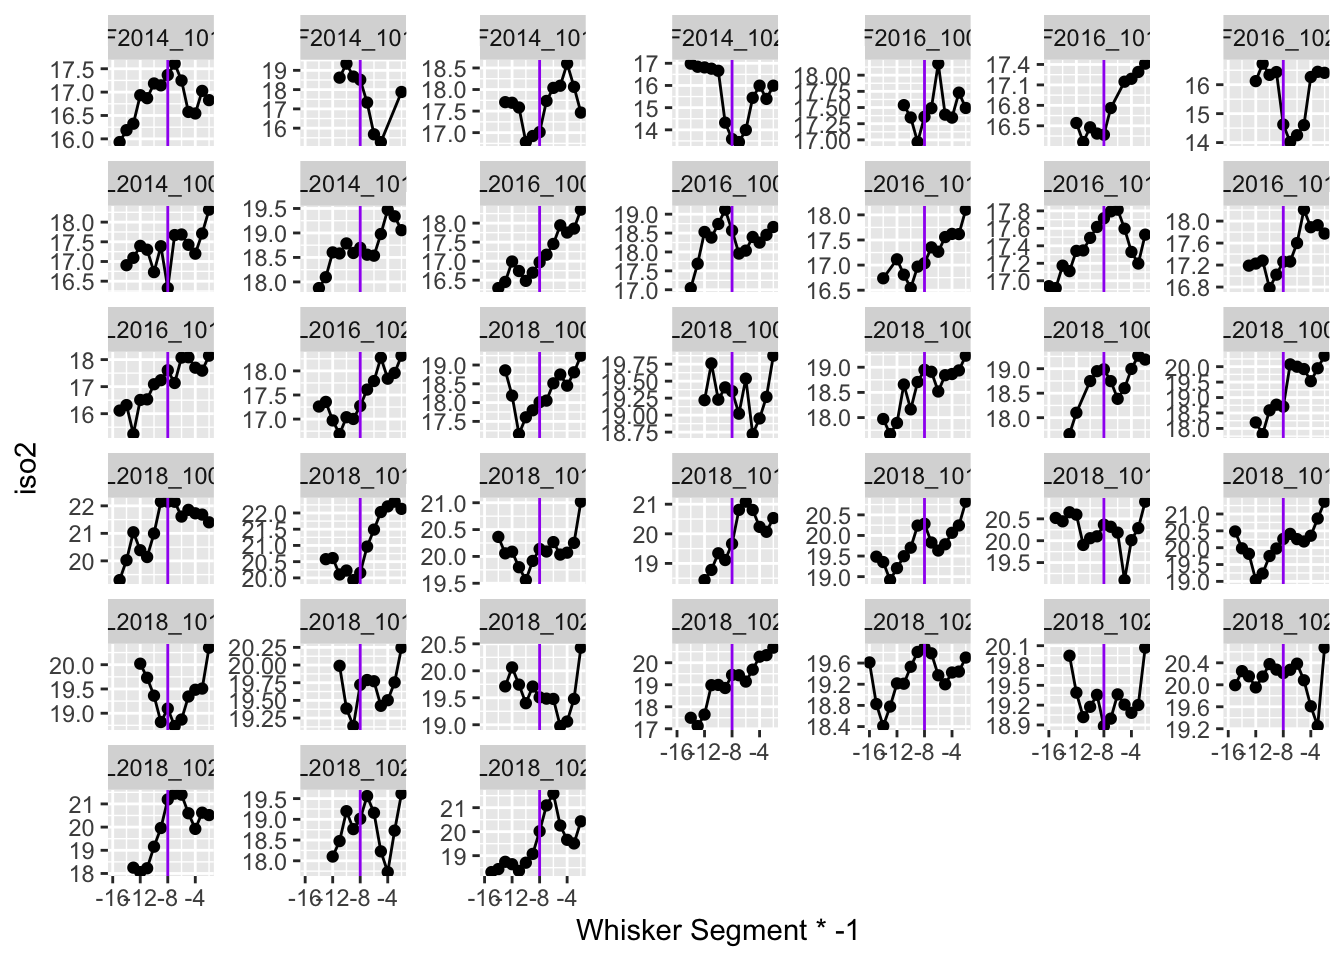

In [ ]:
ggplot(data = whisker_si_data, aes(x=whisker_segment, y = iso2,
                                   group = speno)) + 
  geom_line() + geom_point() + 
  geom_vline(xintercept = -8,color = "purple") + facet_wrap(~speno, scales = "free_y") +
  xlab("Whisker Segment * -1")

For this analysis we only consider samples from the distant half of the whisker to most closely match the in-utero period. We simply averaged those samples.

For comparison of the isotopic space, we used the R package, SIBER.

In [ ]:
pup_si_data <- si_data |> 
  dplyr::filter(age_class %in% c('Pup'),
         whisker_segment_num > 7) |> 
  dplyr::summarise(value = mean(result_value),
                   .by = c(speno,common_name,capture_dt,
                           age_class,sex,result_type)) |> 
  tidyr::pivot_wider(names_from = result_type, values_from = value) |> 
  dplyr::select(iso1 = D13C,iso2 = D15N,group = common_name) |>
  dplyr::mutate(community = 1) |> 
  as.data.frame()


pup_siber <- SIBER::createSiberObject(pup_si_data)


group.ellipses.args  <- list(n = 100, p.interval = 0.95, 
                             ci.mean = T, lty = 1, lwd = 2)
group.hulls.args     <- list(lty = 2, col = "grey20")

adult_si_data <- si_data |> 
  dplyr::filter(!age_class %in% c('Pup','Young of year'),
                whisker_segment_num == 3) |> 
  # dplyr::filter(
  #   dplyr::case_when(
  #   result_type == 'D15N' ~ result_value > 0,
  #   .default = TRUE
  #     )
  # ) |>
  dplyr::summarise(value = mean(result_value),
                   .by = c(speno,common_name,capture_dt,
                           age_class,sex,result_type)) |> 
  tidyr::pivot_wider(names_from = result_type, values_from = value) |> 
  dplyr::select(iso1 = D13C,iso2 = D15N,group = common_name) |>
  dplyr::mutate(community = 1) |> 
  as.data.frame()

adult_siber <- SIBER::createSiberObject(adult_si_data)

group.ellipses.args  <- list(n = 100, p.interval = 0.95,
                             ci.mean = T, lty = 1, lwd = 2)
group.hulls.args     <- list(lty = 2, col = "grey20")

In [ ]:
locs_sf <- readRDS(here::here('data/locs_sf.rds')) |> 
  dplyr::filter(tag_type %in% c('SPLA','SGPS'))

N_tags <- locs_sf |> 
  dplyr::distinct(ptt) |> nrow()
N_ribbon <- locs_sf |> 
  dplyr::filter(species == 'Ribbon seal') |> 
  dplyr::distinct(speno) |> nrow()
N_spotted <- locs_sf |> 
  dplyr::filter(species == 'Spotted seal') |> 
  dplyr::distinct(speno) |> nrow()

## Utilization Distributions from Bio-logger Deployments

A total of 112 bio-loggers (SPLASH family, Wildlife Computers, Redmond, Washington, USA) were deployed on 67 ribbon seals and 45 spotted seals between 2005 and 2022. The deployments span all age classes with the exception of dependent pups for both species and were deployed during the months of April, May, and June. In some cases, deployments were initiated prior to molting and the bio-loggers fell off after a period of weeks to two months. Deployments initiated after molting transmitted up to ~9 months.

All deployments were checked for any data quality issues and inconsistent location estimates before they were run through a course speed filter to remove any locations that would have required a sustained swim speed greater than 15 km/h. Additionally, any deployments with fewer than 30 location estimates or a total deployment length less than 7 days were removed. Lastly, to improve movement model fitting, we thinned the location estimates to remove any time steps less than 10 minutes.

Two data sets for each species were created to include only movement in the months of April, May, and June (‘spring’) and October, November, and December (‘open water’). The continuous time movement model used in the analysis is stationary and predicated on a general range limitation to the underlying movement behavior. Both species have known association with the marginal sea-ice zone during the spring months as they focus on pupping, breeding, and molting. The fall/winter months were chosen to match the time duration of the spring period when the Bering Sea is largely ice free. This period also coincides with the season when in-utero development of pups that are sampled for stable isotope analysis in the spring.

In [ ]:
filter_tracks <- function(tracks_sf) {
  
  crs <- sf::st_crs(tracks_sf)
  dat <- tracks_sf %>%
    sf::st_transform(4326) %>%
    ungroup() %>%
    arrange(deployid, locs_dt)
  dat_tr <- trip::trip(dat, c("locs_dt","deployid"), correct_all = FALSE)
  
  suppressWarnings(
    keep <- trip::sda(
      dat_tr,
      smax = 15 #km/hour
    )
  )
  
  tracks_filt <- dat %>%
    mutate(sda_keep = keep) %>%
    filter(sda_keep) %>%
    dplyr::select(-c(sda_keep, rank)) %>%
    st_transform(crs)
  return(tracks_filt)
}

locs_sf <- locs_sf |> 
  dplyr::filter(tag_type %in% c('SPLA','SGPS'),
                quality != 'Z') |> 
  dplyr::group_by(deployid) |> 
  dplyr::arrange(deployid,locs_dt) |> 
  dplyr::filter(n() > 30L) |> 
  dplyr::filter(difftime(max(locs_dt),min(locs_dt),units = "days") > 7) |> 
  dplyr::ungroup() |> 
  filter_tracks()

locs_sf_spring <- locs_sf |> 
  dplyr::filter(lubridate::month(locs_dt) %in% c(3,4,5)) |> 
  dplyr::group_by(deployid) |> 
  dplyr::arrange(deployid,locs_dt) |> 
  dplyr::filter(n() > 30L) |> 
  dplyr::filter(difftime(max(locs_dt),min(locs_dt),units = "days") > 7) |> 
  dplyr::ungroup()

locs_sf_open <- locs_sf |> 
  dplyr::filter(lubridate::month(locs_dt) %in% c(9,10,11,12)) |> 
  dplyr::group_by(deployid) |> 
  dplyr::arrange(deployid,locs_dt) |> 
  dplyr::filter(n() > 30L) |> 
  dplyr::filter(difftime(max(locs_dt),min(locs_dt),units = "days") > 7) |> 
  dplyr::ungroup()

Utilization distributions were estimated for each species and each of the seasonal periods based on a continuous time movement model (R package `ctmm`). Specifically, optimally weighted auto-correlated kernel density estimates (wAKDE) were created to reflect a more honest account of space use while also mitigating sampling bias from irregular deployment lengths. The weighted AKDE utilization distributions were combined into a population kernel density estimate that should better reflect spatial distribution of the broader population beyond just the sampled seals.

In [ ]:
thin_tracks <- function(locs_sf) {
  dat <- locs_sf |> 
    dplyr::group_by(deployid) |> 
    dplyr::arrange(deployid, locs_dt) |> 
    dplyr::mutate(lag_interval = difftime(locs_dt,dplyr::lag(locs_dt), 
                                          units = "secs"),
                  median_interval = stats::median(lag_interval,na.rm = TRUE)) |> 
    dplyr::filter(is.na(lag_interval) | lag_interval > median_interval/2) |> 
    dplyr::ungroup()
  
  return(dat)
}

In [ ]:
as_telem <- function(locs_sf, out_proj) {
  
  locs_df <- locs_sf |> 
    thin_tracks() |> 
    sfheaders::sf_to_df(fill = TRUE)
  # separate fastloc and argos
  locs_f <- locs_df |> filter(type %in% c("FastGPS","known","User"))
  locs_a <- locs_df |> filter(type == "Argos")
  rm(locs_df)
  
  # rename for movebank conventions and convert
  locs_a <- locs_a |>
    rename(
      individual.local.identifier = deployid,
      timestamp = locs_dt,
      location.long = x,
      location.lat = y,
      Argos.orientation = error_ellipse_orientation,
      Argos.semi.minor = error_semi_minor_axis,
      Argos.semi.major = error_semi_major_axis
    ) %>% mutate(
      Argos.location.class = quality,
      quality = as.character(quality)
    )
  locs_a <- ctmm::as.telemetry(object = locs_a, projection = out_proj)
  locs_a <- tibble(deployid = names(locs_a), telem = locs_a)
  
  if(nrow(locs_f) > 0) {
  locs_f <- locs_f |>
    rename(
      individual.local.identifier = deployid,
      timestamp = locs_dt,
      location.long = x,
      location.lat = y
    ) %>% mutate(
      HDOP = dplyr::case_when(
        type == "known" ~ sqrt(2),
        type == "User" ~ sqrt(2),
        type == "FastGPS" & quality == "4" ~ sqrt(2)*(1163)/20,
        type == "FastGPS" & quality == "5" ~ sqrt(2)*(169)/20,
        type == "FastGPS" & quality == "6" ~ sqrt(2)*(71)/20,
        type == "FastGPS" & quality == "7" ~ sqrt(2)*(43)/20,
        type == "FastGPS" & quality == "8" ~ sqrt(2)*(34)/20,
        type == "FastGPS" & quality == "9" ~ sqrt(2)*(28)/20,
        type == "FastGPS" & quality == "10" ~ sqrt(2)*(24)/20,
        type == "FastGPS" & quality == "11" ~ sqrt(2),
        TRUE ~ Inf
      ),
      quality = as.character(quality)
    )
  locs_f <- ctmm::as.telemetry(object = locs_f, projection = out_proj)
  uere(locs_f) <- 20
  if(!class(locs_f) == "list") { locs_f <- list(locs_f) }
  locs_f <- tibble(deployid = names(locs_f), telem = locs_f)


  locs_df <- bind_rows(locs_a, locs_f) |> group_by(deployid) |> 
    tidyr::nest()
  locs_df <- locs_df |> rowwise() |> mutate(
    data = list(data$telem |> ctmm::tbind())
  )
  } else {
    locs_df <- locs_a |> 
      dplyr::rename(data = telem)
  }
  
  names(locs_df$data) <- locs_df$deployid

  return(locs_df)
}

In [ ]:
locs_telem <- as_telem(locs_sf, out_proj = 'epsg:3571')

12634 ARGOS error ellipses missing. Using location class estimates from Vincent et al (2002).

Minimum sampling interval of 39.6 minutes in HF2005_5880_05L0003

Minimum sampling interval of 51.5 minutes in HF2005_5882_05L0008

Minimum sampling interval of 24.3 minutes in HF2005_5884_05L0009

Minimum sampling interval of 40.4 minutes in HF2005_5890_05L0011

Minimum sampling interval of 38.1 minutes in HF2005_5892_05L0012

Minimum sampling interval of 37.2 minutes in HF2005_5894_05L0013

Minimum sampling interval of 32.8 minutes in HF2005_5896_05L0015

Minimum sampling interval of 45.1 minutes in HF2005_5898_05L0001

Minimum sampling interval of 18.3 minutes in HF2006_5978_05L0236

Minimum sampling interval of 21.8 minutes in HF2006_5982_05L0238

Minimum sampling interval of 32.6 minutes in HF2006_5989_05L0237

Minimum sampling interval of 36.6 minutes in HF2007_6048_05L0240

Minimum sampling interval of 27.3 minutes in HF2007_6066_05L0243

Minimum sampling interval of 47.5 minutes in HF2007_6068_05L0239

Minimum sampling interval of 22.5 minutes in HF2007_6075_06L0130

Minimum sampling interval of 45.5 minutes in HF2007_6089_07L0017

Minimum sampling interval of 38.2 minutes in HF2007_6102_07L0015

Minimum sampling interval of 42.5 minutes in HF2007_6109_06A1350

Minimum sampling interval of 36.7 minutes in HF2007_6110_06L0131

Minimum sampling interval of 29.3 minutes in HF2009_1009_06L0127

Minimum sampling interval of 33.6 minutes in HF2009_1016_09L0048

Minimum sampling interval of 28.8 minutes in HF2009_1017_08L0049

Minimum sampling interval of 18.4 minutes in HF2009_1018_08L0034

Minimum sampling interval of 25 minutes in HF2009_1019_09L0040

Minimum sampling interval of 16.7 minutes in HF2009_1026_09L0028

Minimum sampling interval of 16.8 minutes in HF2009_2009_08L0051

Minimum sampling interval of 25.2 minutes in HF2009_2012_09L0047

Minimum sampling interval of 15.2 minutes in HF2009_2017_09L0050

Minimum sampling interval of 23.5 minutes in HF2009_2018_09L0042

Minimum sampling interval of 16.4 minutes in HF2009_2022_09L0044

Minimum sampling interval of 34 minutes in HF2009_2023_08L0032

Minimum sampling interval of 22.2 minutes in HF2009_2024_06L0125

Minimum sampling interval of 30 minutes in HF2009_2025_09L0051

Minimum sampling interval of 20.6 minutes in HF2009_2026_08L0042

Minimum sampling interval of 20.1 minutes in HF2009_2027_08L0031

Minimum sampling interval of 33.1 minutes in HF2009_2028_09L0030

Minimum sampling interval of 36.5 minutes in HF2009_2029_08L0056

Minimum sampling interval of 23.6 minutes in HF2009_2030_07L0173

Minimum sampling interval of 24.4 minutes in HF2009_2035_08L0047

Minimum sampling interval of 23.3 minutes in HF2009_2037_08L0024

Minimum sampling interval of 26.3 minutes in HF2009_2041_08L0045

Minimum sampling interval of 18 minutes in HF2010_1001_08L0048

Minimum sampling interval of 21.1 minutes in HF2010_1007_06L0129

Minimum sampling interval of 18.1 minutes in HF2010_1010_08L0036

Minimum sampling interval of 23 minutes in HF2010_1017_10A0224

Minimum sampling interval of 20.2 minutes in HF2010_2001_09L0041

Minimum sampling interval of 21.8 minutes in HF2010_2006_09A0899

Minimum sampling interval of 23 minutes in HF2010_2007_08L0054

Minimum sampling interval of 20.8 minutes in HF2010_2009_08L0055

Minimum sampling interval of 21.6 minutes in HF2010_2015_10A0217

Minimum sampling interval of 24.3 minutes in HF2010_2023_10A0229

Minimum sampling interval of 14.1 minutes in HF2014_1001_09A0892

Minimum sampling interval of 13 minutes in HF2014_1003_10A0551

Minimum sampling interval of 12.8 minutes in HF2014_1005_10A0228

Minimum sampling interval of 13.2 minutes in HF2014_1007_10A0234

Minimum sampling interval of 12.2 minutes in HF2014_1011_10A0550

Minimum sampling interval of 30 minutes in HF2014_1013_09A0894

Minimum sampling interval of 13.9 minutes in HF2014_1015_10A0220

Minimum sampling interval of 11.2 minutes in HF2014_1018_10A0226

Minimum sampling interval of 17.2 minutes in HF2014_1022_13A0223

Minimum sampling interval of 13.5 minutes in HF2014_1023_09A0896

Minimum sampling interval of 16.1 minutes in HF2014_1025_09A0888

Minimum sampling interval of 16.6 minutes in HF2016_1002_14A0839

Minimum sampling interval of 18.2 minutes in HF2016_1011_14A0707

Minimum sampling interval of 19 minutes in HF2016_1018_14A0801

Minimum sampling interval of 15.2 minutes in HF2016_1019_14A0862

Minimum sampling interval of 12 minutes in HF2022_1005_19U3070

Minimum sampling interval of 20 minutes in PL2005_5966_05L0002

Minimum sampling interval of 17.1 minutes in PL2005_5967_05L0026

Minimum sampling interval of 20 minutes in PL2005_5968_05L0005

Minimum sampling interval of 21.2 minutes in PL2005_5969_04L0021

Minimum sampling interval of 36.3 minutes in PL2005_5971_05L0017

Minimum sampling interval of 49.3 minutes in PL2006_5976_05L0245

Minimum sampling interval of 26.8 minutes in PL2006_5990_05L0244

Minimum sampling interval of 34.6 minutes in PL2007_6040_07L0019

Minimum sampling interval of 1.26 hours in PL2007_6042_07L0016

Minimum sampling interval of 15.6 minutes in PL2009_1020_09L0043

Minimum sampling interval of 15.5 minutes in PL2009_1025_09L0045

Minimum sampling interval of 24 minutes in PL2009_2002_06L0124

Minimum sampling interval of 13.4 minutes in PL2009_2003_08L0035

Minimum sampling interval of 16.6 minutes in PL2009_2004_08L0033

Minimum sampling interval of 18.2 minutes in PL2009_2005_06L0126

Minimum sampling interval of 17.9 minutes in PL2009_2006_08L0046

Minimum sampling interval of 15.8 minutes in PL2009_2016_08L0039

Minimum sampling interval of 18 minutes in PL2009_2019_08L0050

Minimum sampling interval of 21.5 minutes in PL2009_2020_08L0030

Minimum sampling interval of 21.8 minutes in PL2009_2033_07L0013

Minimum sampling interval of 13 minutes in PL2009_2034_08L0028

Minimum sampling interval of 13.5 minutes in PL2009_2038_08L0053

Minimum sampling interval of 19 minutes in PL2009_2039_08L0040

Minimum sampling interval of 13.6 minutes in PL2010_1002_08L0029

Minimum sampling interval of 12.7 minutes in PL2010_1003_08L0128

Minimum sampling interval of 11.5 minutes in PL2010_2002_08L0052

Minimum sampling interval of 13.5 minutes in PL2010_2004_08L0044

Minimum sampling interval of 12.2 minutes in PL2010_2005_08L0026

Minimum sampling interval of 13 minutes in PL2010_2021_10A0192

Minimum sampling interval of 13.9 minutes in PL2014_1017_10A0554

Minimum sampling interval of 14.2 minutes in PL2014_1019_10A0201

Minimum sampling interval of 13 minutes in PL2014_1020_10A0195

Minimum sampling interval of 13.4 minutes in PL2014_1027_10A0598

Minimum sampling interval of 10.2 minutes in PL2014_1028_10A0196

Minimum sampling interval of 14 minutes in PL2016_1001_14A0844

Minimum sampling interval of 11.4 minutes in PL2016_1003_14A0797

Minimum sampling interval of 18.3 minutes in PL2016_1004_14A0847

Minimum sampling interval of 15.3 minutes in PL2016_1007_14A0824

Minimum sampling interval of 15.4 minutes in PL2016_1016_14A0832

Minimum sampling interval of 14.2 minutes in PL2016_1021_14A0781

Minimum sampling interval of 17.5 minutes in PL2018_1002_17A0776

Minimum sampling interval of 15.9 minutes in PL2018_1009_17A0775

Minimum sampling interval of 13.4 minutes in PL2018_1016_17A0780

Minimum sampling interval of 13.8 minutes in PL2018_1022_17A0976

Minimum sampling interval of 11.2 minutes in PL2018_1027_17A0767

Minimum sampling interval of 2 hours in HF2007_6109_06A1350

Minimum sampling interval of 2.64 hours in HF2022_1005_19U3070

Minimum sampling interval of 3.99 hours in PL2018_1016_17A0780

Minimum sampling interval of 3.99 hours in PL2018_1027_17A0767

1945 ARGOS error ellipses missing. Using location class estimates from Vincent et al (2002).

Minimum sampling interval of 25.6 minutes in PL2005_5966_05L0002

Minimum sampling interval of 25.8 minutes in PL2005_5969_04L0021

Minimum sampling interval of 48.8 minutes in PL2005_5971_05L0017

Minimum sampling interval of 49.3 minutes in PL2006_5976_05L0245

Minimum sampling interval of 25.6 minutes in PL2006_5990_05L0244

Minimum sampling interval of 34.5 minutes in PL2007_6040_07L0019

Minimum sampling interval of 1.74 hours in PL2007_6042_07L0016

Minimum sampling interval of 22.7 minutes in PL2009_1025_09L0045

Minimum sampling interval of 27 minutes in PL2009_2002_06L0124

Minimum sampling interval of 10.7 minutes in PL2009_2003_08L0035

Minimum sampling interval of 15.9 minutes in PL2009_2004_08L0033

Minimum sampling interval of 11.5 minutes in PL2009_2005_06L0126

Minimum sampling interval of 17.6 minutes in PL2009_2006_08L0046

Minimum sampling interval of 20.1 minutes in PL2009_2033_07L0013

Minimum sampling interval of 21.8 minutes in PL2009_2038_08L0053

Minimum sampling interval of 14.4 minutes in PL2010_1002_08L0029

Minimum sampling interval of 13.2 minutes in PL2010_1003_08L0128

Minimum sampling interval of 12.9 minutes in PL2010_2002_08L0052

Minimum sampling interval of 13.4 minutes in PL2010_2004_08L0044

Minimum sampling interval of 14.1 minutes in PL2010_2005_08L0026

Minimum sampling interval of 13 minutes in PL2010_2021_10A0192

Minimum sampling interval of 13.8 minutes in PL2014_1017_10A0554

Minimum sampling interval of 13.2 minutes in PL2014_1019_10A0201

Minimum sampling interval of 10.4 minutes in PL2014_1020_10A0195

Minimum sampling interval of 11.7 minutes in PL2014_1027_10A0598

Minimum sampling interval of 10.1 minutes in PL2014_1028_10A0196

Minimum sampling interval of 14 minutes in PL2016_1001_14A0844

Minimum sampling interval of 11.4 minutes in PL2016_1003_14A0797

Minimum sampling interval of 18.3 minutes in PL2016_1004_14A0847

Minimum sampling interval of 15.3 minutes in PL2016_1007_14A0824

Minimum sampling interval of 15.4 minutes in PL2016_1016_14A0832

Minimum sampling interval of 14.2 minutes in PL2016_1021_14A0781

Minimum sampling interval of 17.5 minutes in PL2018_1002_17A0776

Minimum sampling interval of 15.9 minutes in PL2018_1009_17A0775

Minimum sampling interval of 13.4 minutes in PL2018_1016_17A0780

Minimum sampling interval of 13.8 minutes in PL2018_1022_17A0976

Minimum sampling interval of 11.4 minutes in PL2018_1027_17A0767

Minimum sampling interval of 3.99 hours in PL2018_1016_17A0780

Minimum sampling interval of 3.99 hours in PL2018_1027_17A0767

4652 ARGOS error ellipses missing. Using location class estimates from Vincent et al (2002).

Minimum sampling interval of 15.7 minutes in PL2005_5966_05L0002

Minimum sampling interval of 17.1 minutes in PL2005_5967_05L0026

Minimum sampling interval of 20 minutes in PL2005_5968_05L0005

Minimum sampling interval of 32.5 minutes in PL2005_5971_05L0017

Minimum sampling interval of 30.2 minutes in PL2007_6040_07L0019

Minimum sampling interval of 55.3 minutes in PL2007_6042_07L0016

Minimum sampling interval of 15.4 minutes in PL2009_1020_09L0043

Minimum sampling interval of 12.8 minutes in PL2009_1025_09L0045

Minimum sampling interval of 12 minutes in PL2009_2003_08L0035

Minimum sampling interval of 16.1 minutes in PL2009_2005_06L0126

Minimum sampling interval of 15.5 minutes in PL2009_2006_08L0046

Minimum sampling interval of 20.3 minutes in PL2009_2019_08L0050

Minimum sampling interval of 20.8 minutes in PL2009_2020_08L0030

Minimum sampling interval of 23.5 minutes in PL2009_2033_07L0013

Minimum sampling interval of 12.5 minutes in PL2009_2034_08L0028

Minimum sampling interval of 12.2 minutes in PL2009_2038_08L0053

Minimum sampling interval of 17 minutes in PL2009_2039_08L0040

Minimum sampling interval of 13.7 minutes in PL2010_1002_08L0029

Minimum sampling interval of 12 minutes in PL2010_1003_08L0128

Minimum sampling interval of 13.7 minutes in PL2010_2004_08L0044

Minimum sampling interval of 11.9 minutes in PL2010_2005_08L0026

Minimum sampling interval of 13.8 minutes in PL2010_2021_10A0192

Minimum sampling interval of 12.4 minutes in PL2014_1017_10A0554

Minimum sampling interval of 15.8 minutes in PL2014_1019_10A0201

Minimum sampling interval of 11.8 minutes in PL2014_1020_10A0195

Minimum sampling interval of 13.5 minutes in PL2014_1027_10A0598

1202 ARGOS error ellipses missing. Using location class estimates from Vincent et al (2002).

Minimum sampling interval of 24.2 minutes in HF2005_5880_05L0003

Minimum sampling interval of 35.6 minutes in HF2005_5882_05L0008

Minimum sampling interval of 19.6 minutes in HF2005_5890_05L0011

Minimum sampling interval of 22 minutes in HF2005_5896_05L0015

Minimum sampling interval of 36.5 minutes in HF2005_5898_05L0001

Minimum sampling interval of 24.9 minutes in HF2006_5978_05L0236

Minimum sampling interval of 21.8 minutes in HF2006_5982_05L0238

Minimum sampling interval of 32.6 minutes in HF2006_5989_05L0237

Minimum sampling interval of 41.8 minutes in HF2007_6048_05L0240

Minimum sampling interval of 44.8 minutes in HF2007_6066_05L0243

Minimum sampling interval of 40 minutes in HF2007_6068_05L0239

Minimum sampling interval of 23.2 minutes in HF2007_6075_06L0130

Minimum sampling interval of 28.8 minutes in HF2007_6089_07L0017

Minimum sampling interval of 1.1 hours in HF2007_6109_06A1350

Minimum sampling interval of 26.4 minutes in HF2009_1019_09L0040

Minimum sampling interval of 9.63 minutes in HF2009_2009_08L0051

Minimum sampling interval of 20.8 minutes in HF2009_2012_09L0047

Minimum sampling interval of 17.8 minutes in HF2009_2018_09L0042

Minimum sampling interval of 15.2 minutes in HF2009_2022_09L0044

Minimum sampling interval of 32.5 minutes in HF2009_2029_08L0056

Minimum sampling interval of 18 minutes in HF2010_1001_08L0048

Minimum sampling interval of 21.1 minutes in HF2010_1007_06L0129

Minimum sampling interval of 17.2 minutes in HF2010_1010_08L0036

Minimum sampling interval of 25.1 minutes in HF2010_1017_10A0224

Minimum sampling interval of 20.2 minutes in HF2010_2001_09L0041

Minimum sampling interval of 18.3 minutes in HF2010_2006_09A0899

Minimum sampling interval of 22 minutes in HF2010_2007_08L0054

Minimum sampling interval of 16.3 minutes in HF2010_2009_08L0055

Minimum sampling interval of 15.8 minutes in HF2010_2015_10A0217

Minimum sampling interval of 16.5 minutes in HF2010_2023_10A0229

Minimum sampling interval of 14.1 minutes in HF2014_1001_09A0892

Minimum sampling interval of 13 minutes in HF2014_1003_10A0551

Minimum sampling interval of 12.8 minutes in HF2014_1005_10A0228

Minimum sampling interval of 13.2 minutes in HF2014_1007_10A0234

Minimum sampling interval of 12.2 minutes in HF2014_1011_10A0550

Minimum sampling interval of 30 minutes in HF2014_1013_09A0894

Minimum sampling interval of 13.9 minutes in HF2014_1015_10A0220

Minimum sampling interval of 11.2 minutes in HF2014_1018_10A0226

Minimum sampling interval of 15.6 minutes in HF2014_1022_13A0223

Minimum sampling interval of 13.5 minutes in HF2014_1023_09A0896

Minimum sampling interval of 16.1 minutes in HF2014_1025_09A0888

Minimum sampling interval of 16.6 minutes in HF2016_1002_14A0839

Minimum sampling interval of 18.2 minutes in HF2016_1011_14A0707

Minimum sampling interval of 19 minutes in HF2016_1018_14A0801

Minimum sampling interval of 15.2 minutes in HF2016_1019_14A0862

Minimum sampling interval of 2 hours in HF2007_6109_06A1350

1224 ARGOS error ellipses missing. Using location class estimates from Vincent et al (2002).

Minimum sampling interval of 51.5 minutes in HF2005_5882_05L0008

Minimum sampling interval of 25.1 minutes in HF2005_5884_05L0009

Minimum sampling interval of 49.8 minutes in HF2005_5890_05L0011

Minimum sampling interval of 38.5 minutes in HF2005_5892_05L0012

Minimum sampling interval of 28.9 minutes in HF2005_5896_05L0015

Minimum sampling interval of 1.61 hours in HF2005_5898_05L0001

Minimum sampling interval of 29.2 minutes in HF2007_6048_05L0240

Minimum sampling interval of 18.2 minutes in HF2007_6066_05L0243

Minimum sampling interval of 53.2 minutes in HF2007_6068_05L0239

Minimum sampling interval of 54.8 minutes in HF2007_6089_07L0017

Minimum sampling interval of 23.4 minutes in HF2007_6109_06A1350

Minimum sampling interval of 34.6 minutes in HF2009_1009_06L0127

Minimum sampling interval of 32.6 minutes in HF2009_1016_09L0048

Minimum sampling interval of 21.6 minutes in HF2009_1018_08L0034

Minimum sampling interval of 22.1 minutes in HF2009_1019_09L0040

Minimum sampling interval of 15.8 minutes in HF2009_1026_09L0028

Minimum sampling interval of 24.8 minutes in HF2009_2009_08L0051

Minimum sampling interval of 28.1 minutes in HF2009_2012_09L0047

Minimum sampling interval of 40.2 minutes in HF2009_2018_09L0042

Minimum sampling interval of 51.7 minutes in HF2009_2023_08L0032

Minimum sampling interval of 25.1 minutes in HF2009_2025_09L0051

Minimum sampling interval of 21.6 minutes in HF2009_2026_08L0042

Minimum sampling interval of 31.4 minutes in HF2009_2028_09L0030

Minimum sampling interval of 31.9 minutes in HF2009_2029_08L0056

Minimum sampling interval of 23.2 minutes in HF2009_2030_07L0173

Minimum sampling interval of 20.6 minutes in HF2009_2035_08L0047

Minimum sampling interval of 18.6 minutes in HF2009_2037_08L0024

Minimum sampling interval of 22.5 minutes in HF2009_2041_08L0045

Minimum sampling interval of 1.01 hours in HF2010_1010_08L0036

Minimum sampling interval of 20.1 minutes in HF2010_1017_10A0224

Minimum sampling interval of 33.6 minutes in HF2010_2006_09A0899

Minimum sampling interval of 53.3 minutes in HF2010_2009_08L0055

Minimum sampling interval of 27 minutes in HF2010_2023_10A0229

Minimum sampling interval of 19.2 minutes in HF2014_1022_13A0223

Minimum sampling interval of 2 hours in HF2007_6109_06A1350

In [ ]:
# locs_fits <- vector("list", length = nrow(locs_telem))
# 
# for(i in seq_along(locs_telem$data)) {
#   guess <- ctmm.guess(locs_telem$data[[i]], interactive = FALSE)
#   locs_fits[[i]] <- ctmm.select(locs_telem$data[[i]], guess)
# }

if(params$fit) {
  
  pl_fits_spring <- vector("list", length = nrow(pl_telem_spring))
  
  for(i in seq_along(pl_telem_spring$data)) {
    guess <- ctmm.guess(pl_telem_spring$data[[i]], interactive = FALSE)
    pl_fits_spring[[i]] <- ctmm.select(pl_telem_spring$data[[i]], guess)
  }
  
  saveRDS(pl_fits_spring,'data/pl_fits_spring.rds')
  
  hf_fits_spring <- vector("list", length = nrow(hf_telem_spring))
  
  for(i in seq_along(hf_telem_spring$data)) {
    guess <- ctmm.guess(hf_telem_spring$data[[i]], interactive = FALSE)
    hf_fits_spring[[i]] <- ctmm.select(hf_telem_spring$data[[i]], guess)
  }
  
  saveRDS(hf_fits_spring,'data/hf_fits_spring.rds')
  
  pl_fits_open <- vector("list", length = nrow(pl_telem_open))
  
  for(i in seq_along(pl_telem_open$data)) {
    guess <- ctmm.guess(pl_telem_open$data[[i]], interactive = FALSE)
    pl_fits_open[[i]] <- ctmm.select(pl_telem_open$data[[i]], guess)
  }
  
  saveRDS(pl_fits_open,'data/pl_fits_open.rds')
  
  hf_fits_open <- vector("list", length = nrow(hf_telem_open))
  
  for(i in seq_along(hf_telem_open$data)) {
    guess <- ctmm.guess(hf_telem_open$data[[i]], interactive = FALSE)
    hf_fits_open[[i]] <- ctmm.select(hf_telem_open$data[[i]], guess)
  }
  
  saveRDS(hf_fits_open, 'data/hf_fits_open.rds')
  
} else {
  hf_fits_spring <- readRDS('data/hf_fits_spring.rds')
  pl_fits_spring <- readRDS('data/pl_fits_spring.rds')
  hf_fits_open <- readRDS('data/hf_fits_open.rds')
  pl_fits_open <- readRDS('data/pl_fits_open.rds')
}

In [ ]:
pred_times <- seq(from = hf_telem_spring$data[[1]]$timestamp[1],
                  to = hf_telem_spring$data[[1]]$timestamp[nrow(hf_telem_spring$data[[1]])],
                  by = 15 %#% 'min')

pred_tracks_hf_spring <- vector("list", length = length(hf_fits_spring))

for(i in seq_along(pred_tracks_hf_spring)) {  
  pred_tracks_hf_spring[[i]] <- ctmm::predict(object = hf_fits_spring[[i]],
                data = hf_telem_spring$data[[i]],
                dt = 600)
}

pred_as_sf <- function(object) {
  stopifnot(inherits(object, "telemetry"))
  
  identity <- attr(object, "info")$identity
  timezone <- attr(object, "info")$timezone
  projection <- attr(object, "info")$projection
  
  dat <- tibble(
    deployid = identity,
    timestamp = as.POSIXct(object$t, tz = timezone,
                           origin = '1970-01-01'),
    t = object$t,
    x = object$x,
    y = object$y,
    COV.x.x = object$COV.x.x,
    COV.x.y = object$COV.x.y,
    COV.y.y = object$COV.y.y
  )
  
  dat <- sf::st_as_sf(dat,
                      coords = c("x", "y"),
                      crs = projection)
  
  return(dat)
}

sf_pts2lines <- function(sf_pts) {
  sf_lines <- sf_pts |>
    group_by(deployid) |>
    summarise(do_union = FALSE) |>
    st_cast("LINESTRING")
  
  return(sf_lines)
}

pred_tracks_hf_spring <- purrr::map(pred_tracks_hf_spring, pred_as_sf)
pred_tracks_hf_spring <- do.call(rbind,pred_tracks_hf_spring)

pred_lines_hf_spring <- sf_pts2lines(pred_tracks_hf_spring)


pred_times <- seq(from = pl_telem_spring$data[[1]]$timestamp[1],
                  to = pl_telem_spring$data[[1]]$timestamp[nrow(pl_telem_spring$data[[1]])],
                  by=15 %#% 'min')

pred_tracks_pl_spring <- vector("list", length = length(pl_fits_spring))

for(i in seq_along(pred_tracks_pl_spring)) {  
  pred_tracks_pl_spring[[i]] <- ctmm::predict(object = pl_fits_spring[[i]],
                data = pl_telem_spring$data[[i]],
                dt = 600)
}

pred_tracks_pl_spring <- purrr::map(pred_tracks_pl_spring, pred_as_sf)
pred_tracks_pl_spring <- do.call(rbind,pred_tracks_pl_spring)

pred_lines_pl_spring <- sf_pts2lines(pred_tracks_pl_spring)

pred_times <- seq(from = pl_telem_open$data[[1]]$timestamp[1],
                  to = pl_telem_open$data[[1]]$timestamp[nrow(pl_telem_open$data[[1]])],
                  by=15 %#% 'min')

pred_tracks_pl_open <- vector("list", length = length(pl_fits_open))

for(i in seq_along(pred_tracks_pl_open)) {  
  pred_tracks_pl_open[[i]] <- ctmm::predict(object = pl_fits_open[[i]],
                data = pl_telem_open$data[[i]],
                dt = 600)
}

pred_tracks_pl_open <- purrr::map(pred_tracks_pl_open, pred_as_sf)
pred_tracks_pl_open <- do.call(rbind,pred_tracks_pl_open)

pred_lines_pl_open <- sf_pts2lines(pred_tracks_pl_open)

pred_times <- seq(from = hf_telem_open$data[[1]]$timestamp[1],
                  to = hf_telem_open$data[[1]]$timestamp[nrow(hf_telem_open$data[[1]])],
                  by=15 %#% 'min')

pred_tracks_hf_open <- vector("list", length = length(hf_fits_open))

for(i in seq_along(pred_tracks_hf_open)) {  
  pred_tracks_hf_open[[i]] <- ctmm::predict(object = hf_fits_open[[i]],
                data = hf_telem_open$data[[i]],
                dt = 600)
}

pred_tracks_hf_open <- purrr::map(pred_tracks_hf_open, pred_as_sf)
pred_tracks_hf_open <- do.call(rbind,pred_tracks_hf_open)

pred_lines_hf_open <- sf_pts2lines(pred_tracks_hf_open)

In [ ]:
names(hf_fits_spring) <- names(hf_telem_spring$data)

hf_akde_spring <- akde(hf_telem_spring$data,hf_fits_spring,weights = TRUE)
saveRDS(hf_akde_spring,here::here('data/hf_akde_spring.rds'))

hf_pkde_spring <- pkde(hf_telem_spring$data, hf_akde_spring)
saveRDS(hf_pkde_spring,here::here('data/hf_pkde_spring.rds'))

In [ ]:
names(hf_fits_open) <- names(hf_telem_open$data)

hf_akde_open <- akde(hf_telem_open$data,hf_fits_open,weights = TRUE)
saveRDS(hf_akde_open,here::here('data/hf_akde_open.rds'))

hf_pkde_open <- pkde(hf_telem_open$data, hf_akde_open)
saveRDS(hf_pkde_open,here::here('data/hf_pkde_open.rds'))

In [ ]:
names(pl_fits_spring) <- names(pl_telem_spring$data)

pl_akde_spring <- akde(pl_telem_spring$data,
                       pl_fits_spring,
                       weights = TRUE)
saveRDS(pl_akde_spring,here::here('data/pl_akde_spring.rds'))

pl_pkde_spring <- pkde(pl_telem_spring$data, pl_akde_spring)
saveRDS(pl_pkde_spring,here::here('data/pl_pkde_spring.rds'))

In [ ]:
names(pl_fits_open) <- names(pl_telem_open$data)

pl_akde_open <- akde(pl_telem_open$data,pl_fits_open,weights = TRUE)
saveRDS(pl_akde_open,here::here('data/pl_akde_open.rds'))

pl_pkde_open <- pkde(pl_telem_open$data, pl_akde_open)
saveRDS(pl_pkde_open,here::here('data/pl_pkde_open.rds'))

## Dive Behavior From Bio-logger Deployments

# Results

## Stable Isotope

(n = 8 ribbon; n = 35 spotted)

(n = 23 ribbon; n = 35 spotted)

The figures below show results from the initial stable isotope analysis for pups sampled to represent adult female fall/winter foraging (figure 1) and for sub-adults and adults (figure 2) sampled to represent their foraging close to the time of sampling (spring).

The plots show the values as well as a convex hull and an ellipse which represents the 95% confidence interval around the bivariate mean.

In [ ]:
par(mfrow=c(1,1))
plotSiberObject(pup_siber,
                ax.pad = 1.5,
                hulls = F, 
                ellipses = T, group.ellipses.args = group.ellipses.args,
                group.hulls = T, group.hulls.args = group.hulls.args,
                bty = "L",
                iso.order = c(1,2),
                xlab = expression({delta}^13*C),
                ylab = expression({delta}^15*N)
)
legend("topright",colnames(groupMetricsML(adult_siber)),
       col = c(2:1,2:1), lty=1)

In [ ]:
par(mfrow=c(1,1))
plotSiberObject(adult_siber,
                ax.pad = 1.5,
                hulls = F, 
                ellipses = T, group.ellipses.args = group.ellipses.args,
                group.hulls = T, group.hulls.args = group.hulls.args,
                bty = "L",
                iso.order = c(1,2),
                xlab = expression({delta}^13*C),
                ylab = expression({delta}^15*N)
)
legend("topright",colnames(groupMetricsML(adult_siber)),
       col = c(2:1,2:1), lty=1)

## Predicted Movement from Bio-Loggers

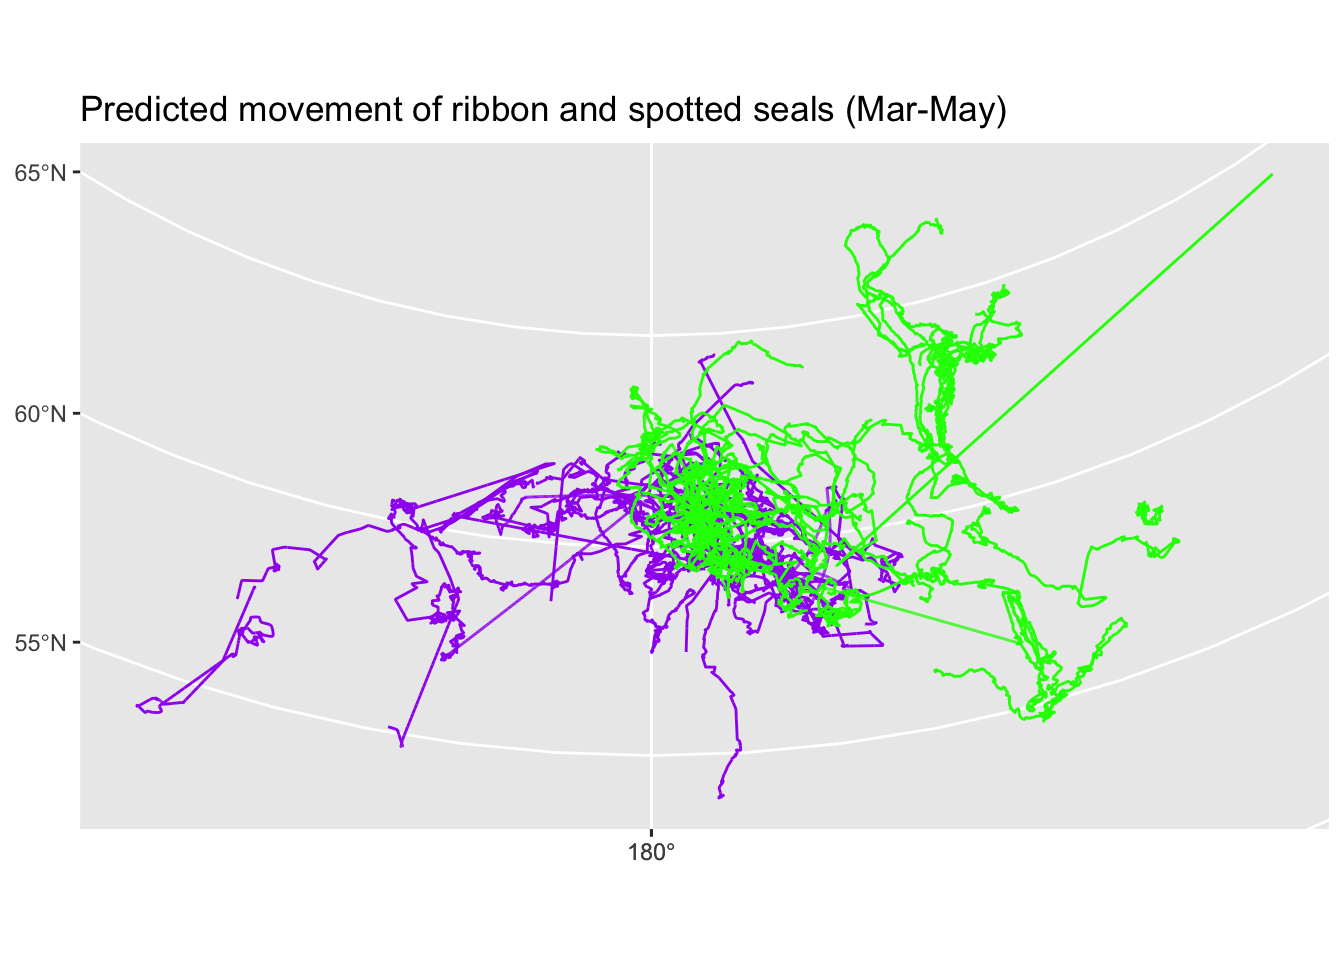

In [ ]:
ggplot() +
  layer_spatial(data = pred_lines_hf_spring, color = 'purple') +
  layer_spatial(data = pred_lines_pl_spring, color = 'green') +
  ggtitle('Predicted movement of ribbon and spotted seals (Mar-May)')

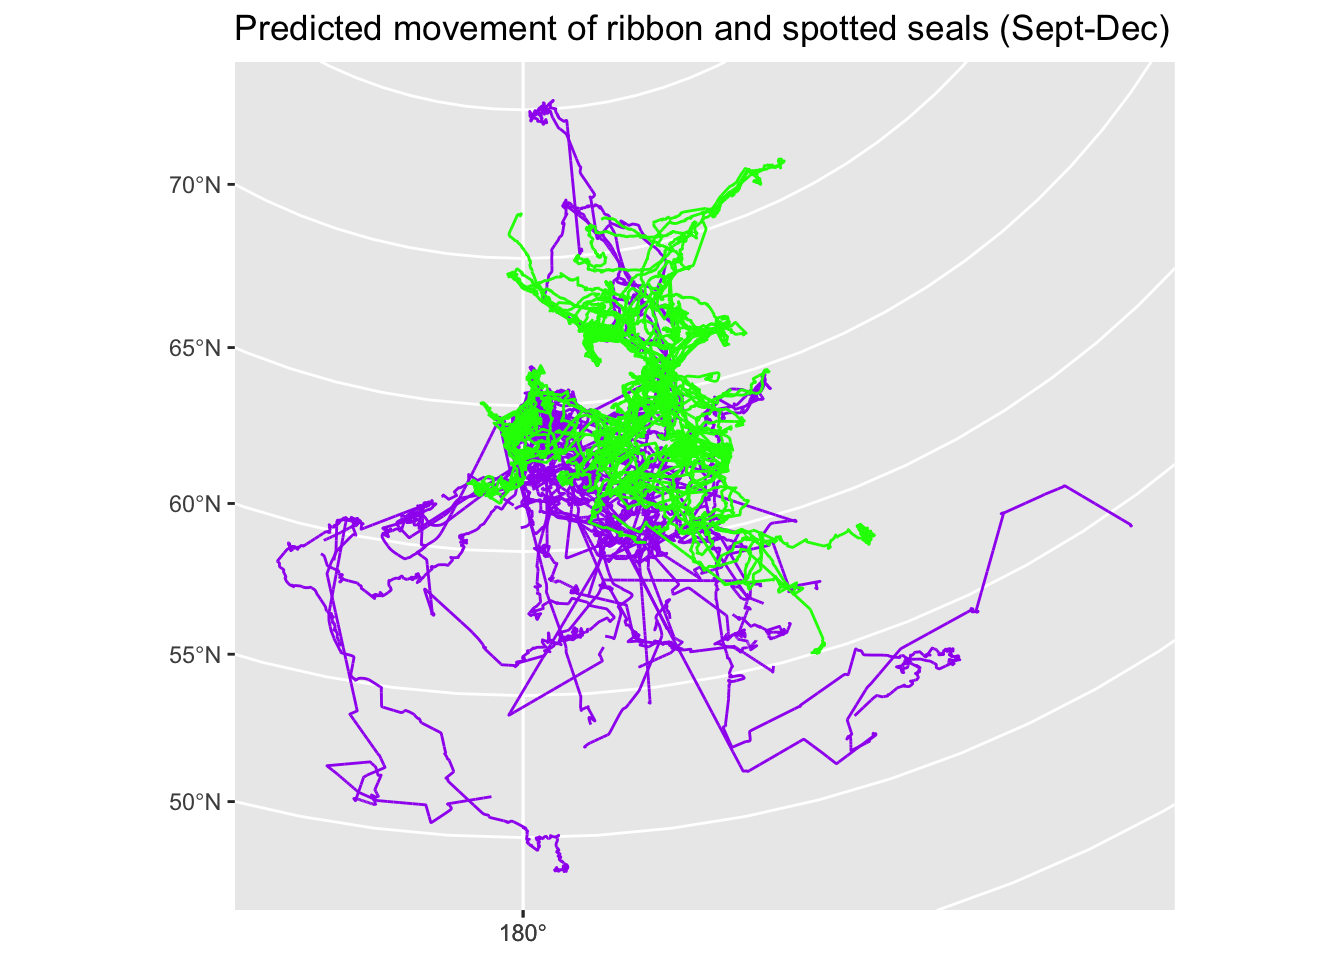

In [ ]:
ggplot() +
  layer_spatial(data = pred_lines_hf_open, color = 'purple') +
  layer_spatial(data = pred_lines_pl_open, color = 'green') +
  ggtitle('Predicted movement of ribbon and spotted seals (Sept-Dec)')

### References